# Sklearn-Linear Regression 

## Importing the relevant libraries

In [487]:
# For this practical example we will need the following libraries and modules
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [488]:
# Load the data from a .csv in the same folder
raw_data = pd.read_csv('1.04. Real-life example.csv')

# Let's explore the top 5 rows of the df
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.00,sedan,277,2.00,Petrol,yes,1991,320
1,Mercedes-Benz,7900.00,van,427,2.90,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.00,sedan,358,5.00,Gas,yes,2003,S 500
3,Audi,23000.00,crossover,240,4.20,Petrol,yes,2007,Q7
4,Toyota,18300.00,crossover,120,2.00,Petrol,yes,2011,Rav 4


The dataset appears to be related to used cars, containing information on various attributes of the cars. Here is a brief description of each column in the dataset:

    - Brand: The manufacturer or brand of the car (e.g., BMW, Mercedes-Benz, Audi, Toyota).
    - Price: The price of the car in unspecified currency.
    - Body: The type of car body (e.g., sedan, van, crossover).
    - Mileage: The total distance the car has traveled, typically measured in kilometers.
    - EngineV: The engine volume, likely in liters.
    - Engine Type: The type of engine (e.g., Petrol, Diesel, Gas).
    - Registration: Whether the car is registered (yes/no).
    - Year: The year of manufacture of the car.
    - Model: The specific model of the car.

## Preprocessing

### Exploring the descriptive statistics of the variables

In [492]:
# Descriptive statistics are very useful for initial exploration of the variables
# By default, only descriptives for the numerical variables are shown
# To include the categorical ones, you should specify this with an argument
raw_data.describe(include='all')

# Note that categorical variables don't have some types of numerical descriptives
# and numerical variables don't have some types of categorical descriptives

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.00,4345,4345.00,4195.00,4345,4345,4345.00,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.75,NaN,161.24,2.79,NaN,NaN,2006.55,NaN
std,NaN,25584.24,NaN,105.71,5.07,NaN,NaN,6.72,NaN
min,NaN,600.00,NaN,0.00,0.60,NaN,NaN,1969.00,NaN
25%,NaN,6999.00,NaN,86.00,1.80,NaN,NaN,2003.00,NaN
50%,NaN,11500.00,NaN,155.00,2.20,NaN,NaN,2008.00,NaN
75%,NaN,21700.00,NaN,230.00,3.00,NaN,NaN,2012.00,NaN


### Determining the variables of interest

In [494]:
# For these several lessons, we will create the regression without 'Model'
# Certainly, when you work on the problem on your own, you could create a regression with 'Model'
data = raw_data.drop(['Model'],axis=1)

# Let's check the descriptives without 'Model'
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.00,4345,4345.00,4195.00,4345,4345,4345.00
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.75,NaN,161.24,2.79,NaN,NaN,2006.55
std,NaN,25584.24,NaN,105.71,5.07,NaN,NaN,6.72
min,NaN,600.00,NaN,0.00,0.60,NaN,NaN,1969.00
25%,NaN,6999.00,NaN,86.00,1.80,NaN,NaN,2003.00
50%,NaN,11500.00,NaN,155.00,2.20,NaN,NaN,2008.00
75%,NaN,21700.00,NaN,230.00,3.00,NaN,NaN,2012.00


### Dealing with missing values

To perform linear regression, we need to handle the missing values in the dataset. Here are a few common approaches to handle missing values:

    - Remove rows with missing values.
    - Fill missing values with a specific value (e.g., mean, median, mode).
    - Predict missing values using other available data.

In [497]:
# data.isnull() # shows a df with the information whether a data point is null 
# Since True = the data point is missing, while False = the data point is not missing, we can sum them
# This will give us the total number of missing values feature-wise
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

The missing values in the dataset are as follows:

    - Price: 172 missing values
    - EngineV: 150 missing values

In [499]:
# Let's simply drop all missing values
# This is not always recommended, however, when we remove less than 5% of the data, it is okay
data_no_mv = data.dropna(axis=0)

In [500]:
# Let's check the descriptives without the missing values
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.00,4025,4025.00,4025.00,4025,4025,4025.00
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.31,NaN,163.57,2.76,NaN,NaN,2006.38
std,NaN,25815.73,NaN,103.39,4.94,NaN,NaN,6.70
min,NaN,600.00,NaN,0.00,0.60,NaN,NaN,1969.00
25%,NaN,6999.00,NaN,90.00,1.80,NaN,NaN,2003.00
50%,NaN,11500.00,NaN,158.00,2.20,NaN,NaN,2007.00
75%,NaN,21900.00,NaN,230.00,3.00,NaN,NaN,2012.00


### Checking Outlier using Boxplot

To check for outliers in the dataset, we can visualize the data using box plots for numerical columns such as Price, Mileage, and EngineV. This will help us identify any extreme values that might affect the linear regression analysis.

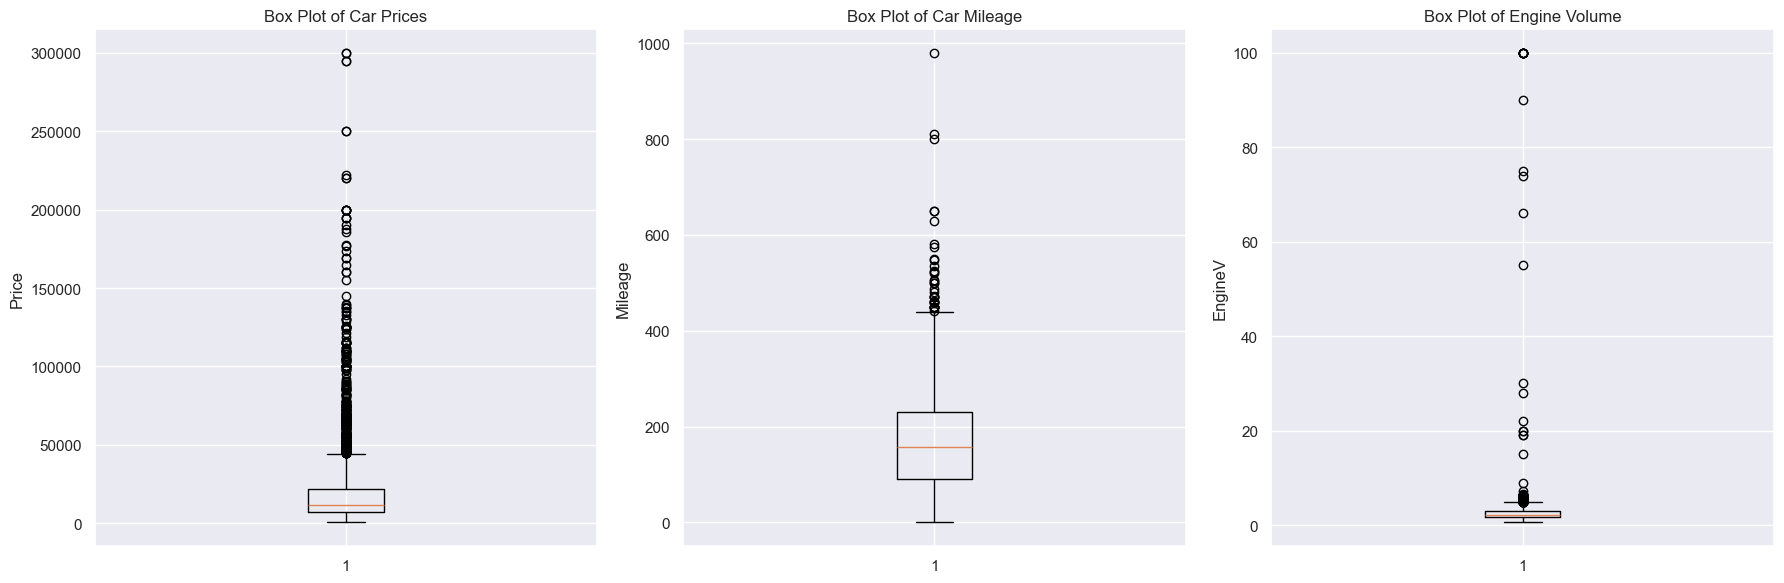

In [503]:
# Generate box plots for numerical columns

# Set up the figure
plt.figure(figsize=(18, 6))

# Box plot for Price
plt.subplot(1, 3, 1)
plt.boxplot(data_no_mv['Price'])
plt.title('Box Plot of Car Prices')
plt.ylabel('Price')

# Box plot for Mileage
plt.subplot(1, 3, 2)
plt.boxplot(data_no_mv['Mileage'])
plt.title('Box Plot of Car Mileage')
plt.ylabel('Mileage')

# Box plot for EngineV
plt.subplot(1, 3, 3)
plt.boxplot(data_no_mv['EngineV'])
plt.title('Box Plot of Engine Volume')
plt.ylabel('EngineV')

# Display the plots
plt.tight_layout()
plt.show()

The box plots above show the distribution of the numerical columns in the dataset:

    - Price: There are some outliers in the car prices, with several values significantly higher than the rest.
    - Mileage: The distribution of mileage also shows outliers, with some cars having much higher mileage than others.
    - EngineV: The engine volume has a few outliers as well, particularly on the higher end.

### Exploring the PDFs

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Price', ylabel='Count'>

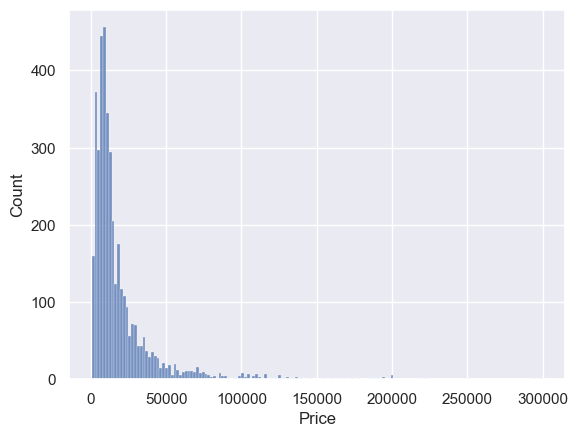

In [506]:
# A great step in the data exploration is to display the probability distribution function (PDF) of a variable
# The PDF will show us how that variable is distributed 
# This makes it very easy to spot anomalies, such as outliers
# The PDF is often the basis on which we decide whether we want to transform a feature
sns.histplot(data_no_mv['Price'])

The histogram above shows the distribution of car prices in the cleaned dataset.

### Dealing with outliers

To handle the outliers, we can use the Interquartile Range (IQR) method to filter them out. The IQR method defines outliers as data points that fall below $Q1−1.5×IQR$ or above $Q3+1.5×IQR$, where Q1 and Q3 are the first and third quartiles, respectively. But here, we will use percentile. The percentile method is a technique used to treat outliers by identifying and capping extreme values based on a specified percentage threshold. Using percentiles can indeed be a good approach to handle outliers. We can filter out the top and bottom 1% of the data points, which is a common method to address outliers. 

In [510]:
# Obviously there are some outliers present 

# Without diving too deep into the topic, we can deal with the problem easily by removing 0.5%, or 1% of the problematic samples
# Here, the outliers are situated around the higher prices (right side of the graph)
# Logic should also be applied
# This is a dataset about used cars, therefore one can imagine how $300,000 is an excessive price

# Outliers are a great issue for OLS, thus we must deal with them in some way
# It may be a useful exercise to try training a model without removing the outliers

# Let's declare a variable that will be equal to the 99th percentile of the 'Price' variable
q = data_no_mv['Price'].quantile(0.99)
# Then we can create a new df, with the condition that all prices must be below the 99 percentile of 'Price'
data_1 = data_no_mv[data_no_mv['Price']<q]
# In this way we have essentially removed the top 1% of the data about 'Price'
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.00,3984,3984.00,3984.00,3984,3984,3984.00
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.12,NaN,165.12,2.74,NaN,NaN,2006.29
std,NaN,18976.27,NaN,102.77,4.96,NaN,NaN,6.67
min,NaN,600.00,NaN,0.00,0.60,NaN,NaN,1969.00
25%,NaN,6980.00,NaN,93.00,1.80,NaN,NaN,2002.75
50%,NaN,11400.00,NaN,160.00,2.20,NaN,NaN,2007.00
75%,NaN,21000.00,NaN,230.00,3.00,NaN,NaN,2011.00


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Price', ylabel='Count'>

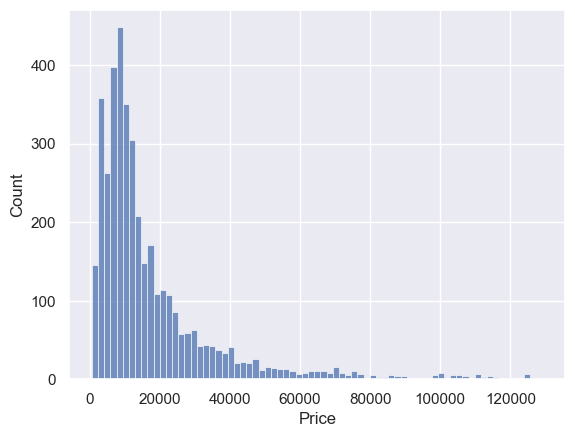

In [511]:
# We can check the PDF once again to ensure that the result is still distributed in the same way overall
# however, there are much fewer outliers
sns.histplot(data_1['Price'])

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Mileage', ylabel='Count'>

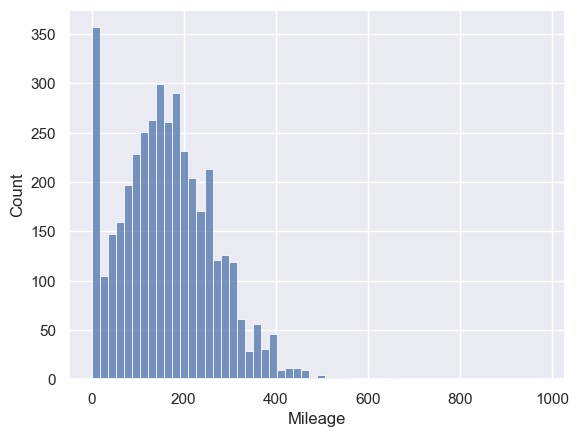

In [512]:
# We can treat the other numerical variables in a similar way
sns.histplot(data_no_mv['Mileage'])

In [513]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Mileage', ylabel='Count'>

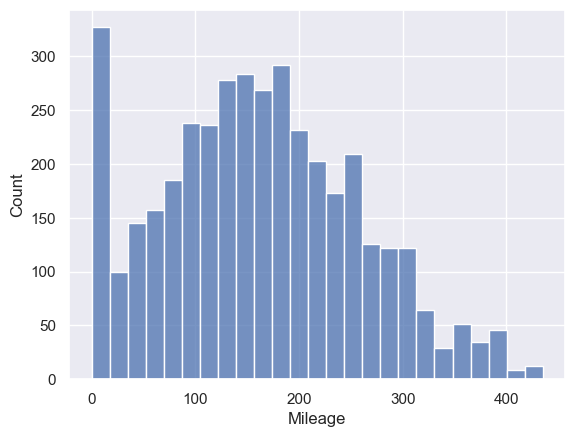

In [514]:
# This plot looks kind of normal, doesn't it?
sns.histplot(data_2['Mileage'])

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='EngineV', ylabel='Count'>

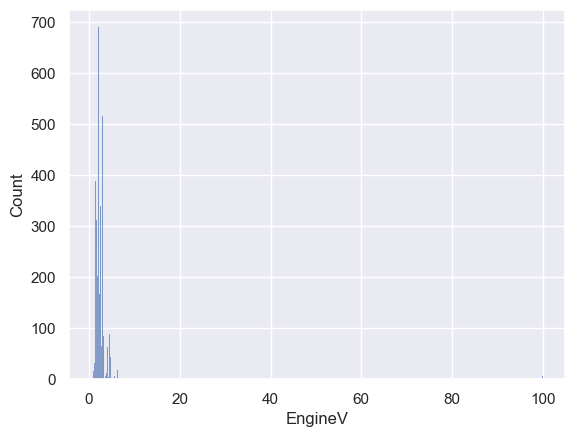

In [515]:
# The situation with engine volume is very strange
# In such cases it makes sense to manually check what may be causing the problem
# In our case the issue comes from the fact that most missing values are indicated with 99.99 or 99
# There are also some incorrect entries like 75
sns.histplot(data_no_mv['EngineV'])

In [516]:
# A simple Google search can indicate the natural domain of this variable
# Car engine volumes are usually (always?) below 6.5l
# This is a prime example of the fact that a domain expert (a person working in the car industry)
# may find it much easier to determine problems with the data than an outsider
data_3 = data_2[data_2['EngineV']<6.5]

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='EngineV', ylabel='Count'>

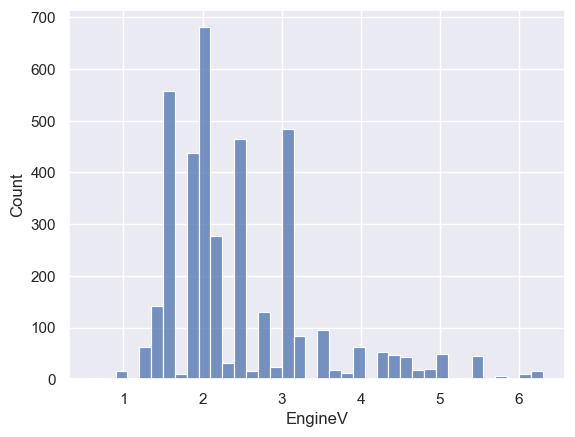

In [517]:
# Following this graph, we realize we can actually treat EngineV as a categorical variable
# Even so, in this course we won't, but that's yet something else you may try on your own
sns.histplot(data_3['EngineV'])

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Year', ylabel='Count'>

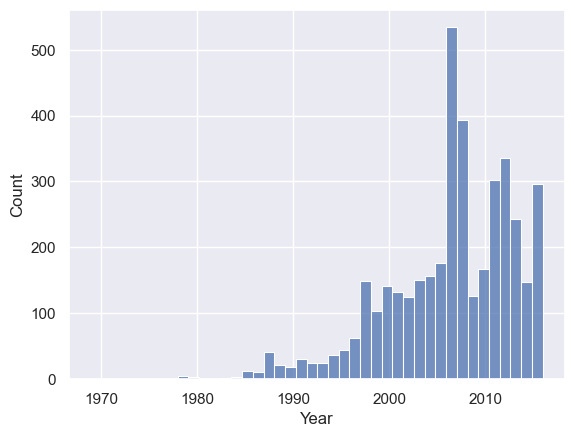

In [518]:
# Finally, the situation with 'Year' is similar to 'Price' and 'Mileage'
# However, the outliers are on the low end
sns.histplot(data_no_mv['Year'])

We filter out the bottom 1% of the data points. 

In [520]:
# I'll simply remove them
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year']>q]

/var/folders/_x/n9qhqrrj4qq6rh43rhd3r9c80000gn/T/ipykernel_31470/730772117.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_4['Year'])
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Year', ylabel='Density'>

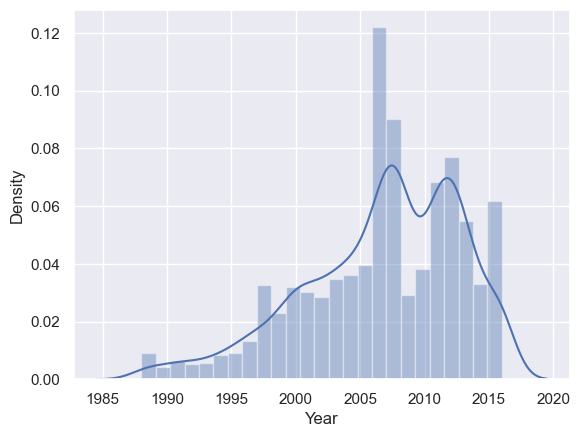

In [521]:
# Here's the new result
sns.distplot(data_4['Year'])

In [522]:
# When we remove observations, the original indexes are preserved
# If we remove observations with indexes 2 and 3, the indexes will go as: 0,1,4,5,6
# That's very problematic as we tend to forget about it (later you will see an example of such a problem)

# Finally, once we reset the index, a new column will be created containing the old index (just in case)
# We won't be needing it, thus 'drop=True' to completely forget about it
data_cleaned = data_4.reset_index(drop=True)

In [523]:
# Let's see what's left
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.00,3867,3867.00,3867.00,3867,3867,3867.00
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.46,NaN,160.54,2.45,NaN,NaN,2006.71
std,NaN,19085.86,NaN,95.63,0.95,NaN,NaN,6.10
min,NaN,800.00,NaN,0.00,0.60,NaN,NaN,1988.00
25%,NaN,7200.00,NaN,91.00,1.80,NaN,NaN,2003.00
50%,NaN,11700.00,NaN,157.00,2.20,NaN,NaN,2008.00
75%,NaN,21700.00,NaN,225.00,3.00,NaN,NaN,2012.00


## This is the code with 99th percentile for all

The 99th percentile value typically lies very close to the maximum value in a distribution with a limited number of outliers. For EngineV, given typical car engine volumes, the 99th percentile would likely be around the upper range observed in your dataset.

In [526]:
# Define a function to remove outliers using percentile method
#def remove_outliers_percentile(df, column, lower_percentile=0.01, upper_percentile=0.99):
 #   lower_bound = df[column].quantile(lower_percentile)
  #  upper_bound = df[column].quantile(upper_percentile)
   # return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers for Price, Mileage, and EngineV using percentile method
#data_no_mv = remove_outliers_percentile(data_no_mv, 'Price')
#data_no_mv = remove_outliers_percentile(data_no_mv, 'Mileage')
#data_no_mv = remove_outliers_percentile(data_no_mv, 'EngineV')

# Plot the distribution of car prices after removing outliers
#plt.figure(figsize=(10, 6))
#plt.hist(data_no_mv['Price'], bins=30, edgecolor='k', alpha=0.7)
#plt.title('Distribution of Car Prices (Outliers Removed)')
#plt.xlabel('Price')
#plt.ylabel('Frequency')
#plt.grid(True)
#plt.show()

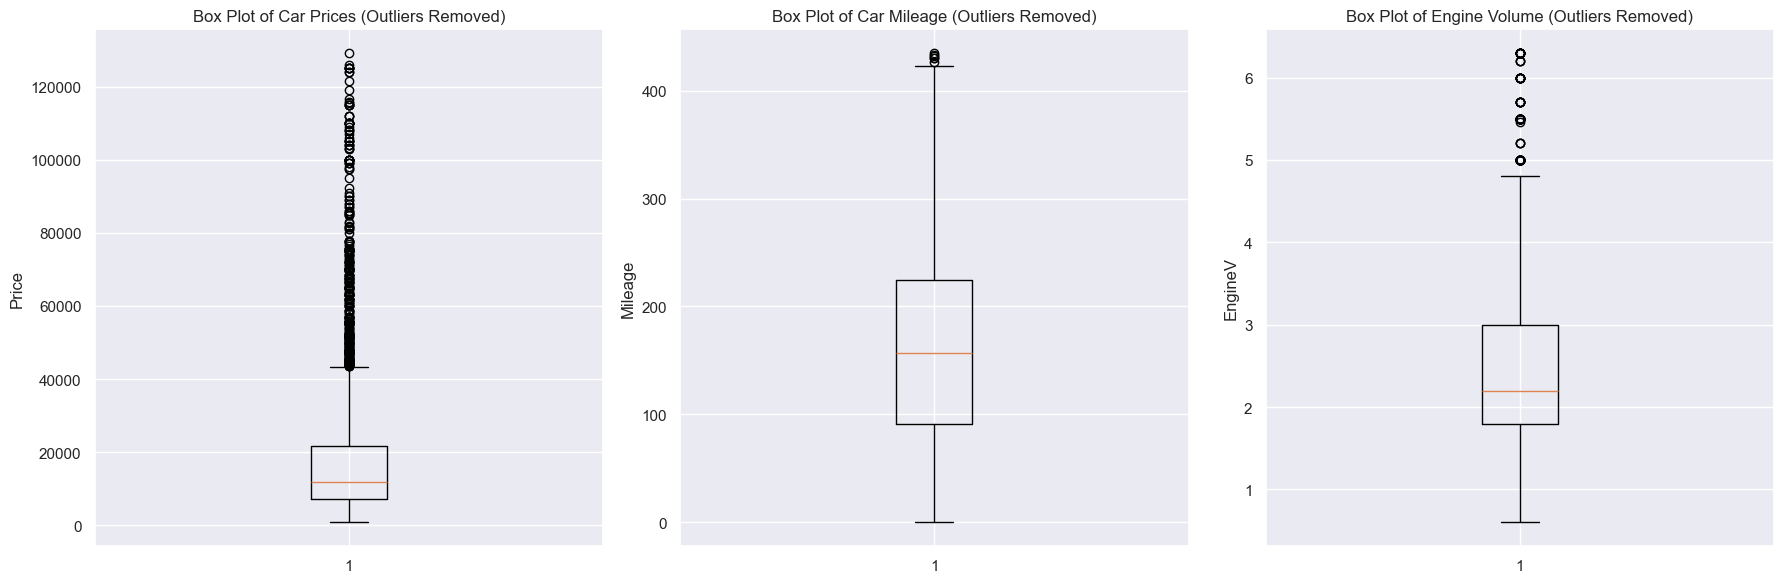

In [527]:
# Generate box plots for numerical columns after removing outliers

# Set up the figure
plt.figure(figsize=(18, 6))

# Box plot for Price
plt.subplot(1, 3, 1)
plt.boxplot(data_cleaned['Price'])
plt.title('Box Plot of Car Prices (Outliers Removed)')
plt.ylabel('Price')

# Box plot for Mileage
plt.subplot(1, 3, 2)
plt.boxplot(data_cleaned['Mileage'])
plt.title('Box Plot of Car Mileage (Outliers Removed)')
plt.ylabel('Mileage')

# Box plot for EngineV
plt.subplot(1, 3, 3)
plt.boxplot(data_cleaned['EngineV'])
plt.title('Box Plot of Engine Volume (Outliers Removed)')
plt.ylabel('EngineV')

# Display the plots
plt.tight_layout()
plt.show()

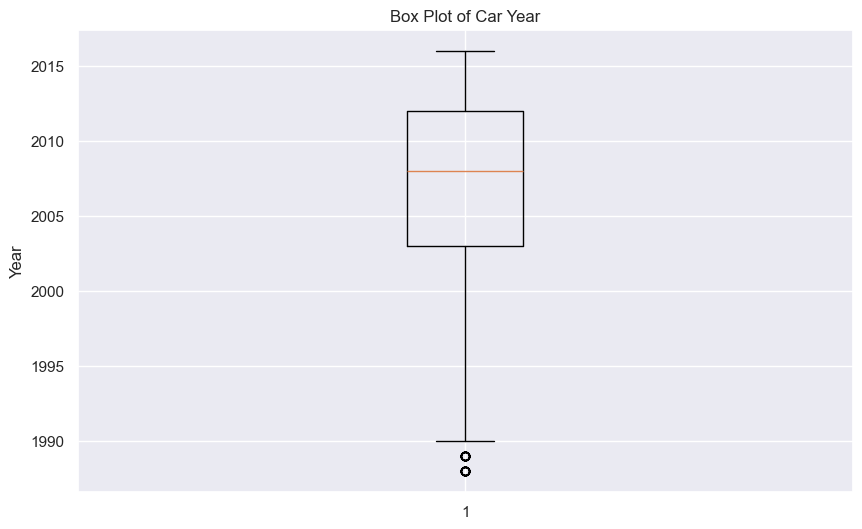

count   3867.00
mean    2006.71
std        6.10
min     1988.00
25%     2003.00
50%     2008.00
75%     2012.00
max     2016.00
Name: Year, dtype: float64


In [528]:
# Generate a box plot for the Year variable to check for outliers
plt.figure(figsize=(10, 6))
plt.boxplot(data_cleaned['Year'])
plt.title('Box Plot of Car Year')
plt.ylabel('Year')
plt.grid(True)
plt.show()

# Calculate descriptive statistics for the Year variable
year_descriptive_stats = data_cleaned['Year'].describe()
print(year_descriptive_stats)

In [529]:
# Remove the bottom 1% outliers for the Year variable
#cleaned_data_year = cleaned_data[cleaned_data['Year'] >= cleaned_data['Year'].quantile(0.01)]

# Generate descriptive statistics for the cleaned dataset
#cleaned_descriptive_stats_year = cleaned_data_year.describe(include='all')
#print(cleaned_descriptive_stats_year)

## Checking the OLS assumptions

To check the OLS (Ordinary Least Squares) assumptions, we need to examine several key assumptions that underpin linear regression. These include:

- Linearity: The relationship between the independent and dependent variables should be linear.
- Independence: Observations should be independent of each other.
- Homoscedasticity: The residuals should have constant variance.
- Normality: The residuals should be normally distributed.
- No multicollinearity: Independent variables should not be highly correlated.

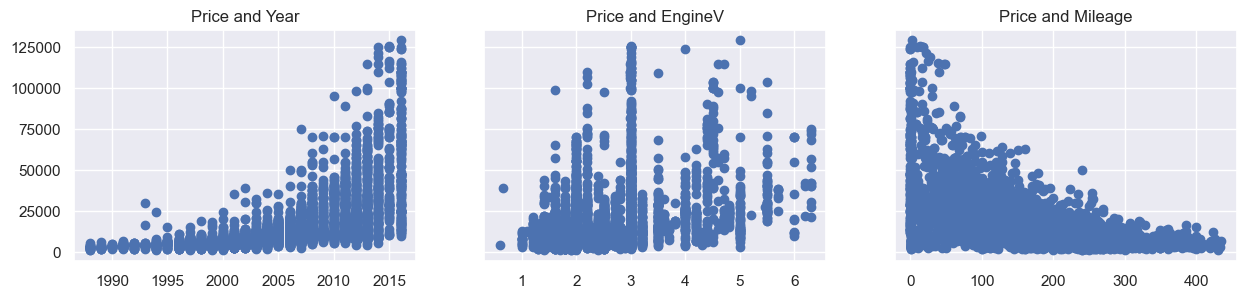

In [532]:
# Here we decided to use some matplotlib code, without explaining it
# You can simply use plt.scatter() for each of them (with your current knowledge)
# But since Price is the 'y' axis of all the plots, it made sense to plot them side-by-side (so we can compare them)
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Mileage')


plt.show()

From the plot, we can see that there is no linear relationship. So, we have to transform one or more variables. The patterns are quite exponentiel. Here are the scatter plots showing the distribution of car prices with respect to other numerical variables:

Price vs Mileage:
    This plot illustrates how the car price varies with mileage. Generally, cars with lower mileage tend to have higher prices.

Price vs EngineV:
    This plot shows the relationship between car prices and engine volume. There is a trend that cars with higher engine volumes are generally priced higher.

Price vs Year:
    This plot depicts how the car price changes with the year of manufacture. Newer cars tend to have higher prices.

When the relationship between the dependent variable (Price) and the independent variables (Mileage, EngineV, Year) is not linear, we can use several techniques to transform the variables or use polynomial regression to capture the non-linear relationships. Here are some approaches:

- Log Transformation: Apply a log transformation to the dependent variable, independent variables, or both to linearize the relationships.
- Polynomial Features: Include polynomial terms (squared, cubic, etc.) of the independent variables to capture non-linear relationships.
- Interaction Terms: Include interaction terms between the independent variables.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Price', ylabel='Count'>

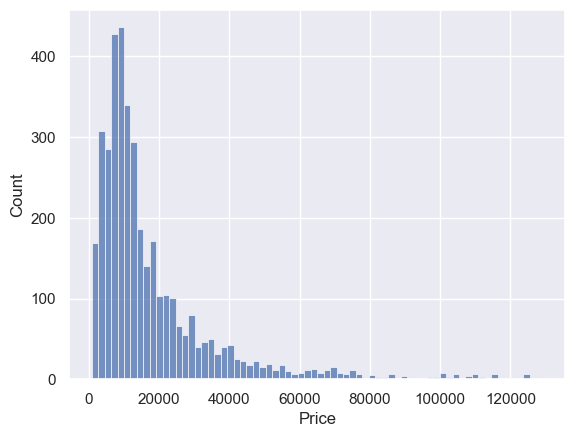

In [535]:
# From the subplots and the PDF of price, we can easily determine that 'Price' is exponentially distributed
# A good transformation in that case is a log transformation
sns.histplot(data_cleaned['Price'])

### Relaxing the assumptions

In [537]:
# Let's transform 'Price' with a log transformation
log_price = np.log(data_cleaned['Price'])

# Then we add it to our data frame
data_cleaned['log_price'] = log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.00,sedan,277,2.00,Petrol,yes,1991,8.34
1,Mercedes-Benz,7900.00,van,427,2.90,Diesel,yes,1999,8.97
2,Mercedes-Benz,13300.00,sedan,358,5.00,Gas,yes,2003,9.50
3,Audi,23000.00,crossover,240,4.20,Petrol,yes,2007,10.04
4,Toyota,18300.00,crossover,120,2.00,Petrol,yes,2011,9.81
...,...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.00,van,163,2.50,Diesel,yes,2008,9.35
3863,Toyota,17900.00,sedan,35,1.60,Petrol,yes,2014,9.79
3864,Mercedes-Benz,125000.00,sedan,9,3.00,Diesel,yes,2014,11.74
3865,BMW,6500.00,sedan,1,3.50,Petrol,yes,1999,8.78


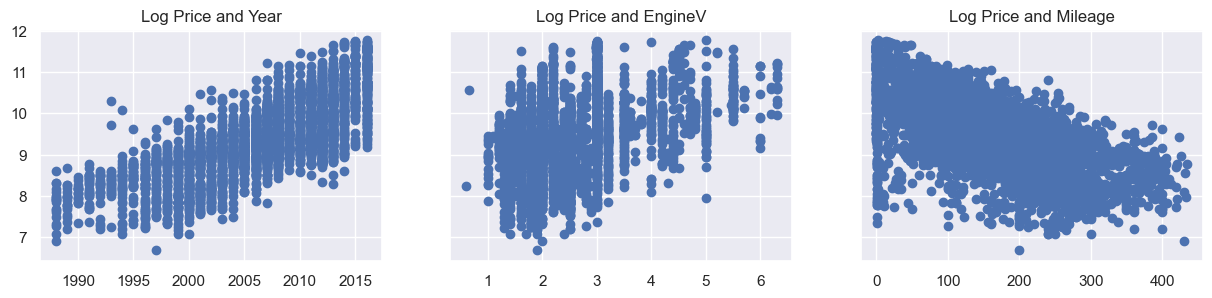

In [538]:
# Let's check the three scatters once again
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('Log Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('Log Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('Log Price and Mileage')


plt.show()

# The relationships show a clear linear relationship
# This is some good linear regression material

# Alternatively we could have transformed each of the independent variables

### Homoscedasticity

Homoscedasticity: Plot the residuals against fitted values. The homoscedasticity assumption generally holds, as we can see in the graphs. We already implemented a log transformation which is the most common fit for homoscedasticity. 

### No Autocorrelation  / Independent

Since the data is not time series data or panel data, we don't really need to put much effort into that. Each row here comes from different customer. So, there is no reason for the observations to be dependent to each other.

In [543]:
# Since we will be using the log price variable, we can drop the old 'Price' one
data_cleaned = data_cleaned.drop(['Price'],axis=1)

### Multicollinearity

No multicollinearity: Calculate the Variance Inflation Factor (VIF) for the independent variables. Variance inflation factor, VIF, for one exogenous variable

The variance inflation factor is a measure for the increase of the variance of the parameter estimates if an additional variable, given by exog_idx is added to the linear regression. It is a measure for multicollinearity of the design matrix, exog.

One recommendation is that if VIF is greater than 5, then the explanatory variable given by exog_idx is highly collinear with the other explanatory variables, and the parameter estimates will have large standard errors because of this. (https://www.statsmodels.org/stable/generated/statsmodels.stats.outliers_influence.variance_inflation_factor.html)

VIF $\epsilon [1, +inf]$
VIF = 1 : no multicollinearity
1 < VIF < 5 :  Perfectly OK
VIF > 5 : unacceptable

In [546]:
# Let's quickly see the columns of our data frame
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

In [547]:
# sklearn does not have a built-in way to check for multicollinearity
# one of the main reasons is that this is an issue well covered in statistical frameworks and not in ML ones
# surely it is an issue nonetheless, thus we will try to deal with it

# Here's the relevant module
# full documentation: http://www.statsmodels.org/dev/_modules/statsmodels/stats/outliers_influence.html#variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

# To make this as easy as possible to use, we declare a variable where we put
# all features where we want to check for multicollinearity
# since our categorical data is not yet preprocessed, we will only take the numerical ones
variables = data_cleaned[['Mileage','Year','EngineV']]

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = variables.columns

In [548]:
# Let's explore the result
vif

,VIF,Features
0,3.79,Mileage
1,10.35,Year
2,7.66,EngineV


Year is definitely too correlated with the other variables.

In [550]:
# Since Year has the highest VIF, I will remove it from the model
# This will drive the VIF of other variables down!!! 
# So even if EngineV seems with a high VIF, too, once 'Year' is gone that will no longer be the case
data_no_multicollinearity = data_cleaned.drop(['Year'],axis=1)

## Create dummy variables

For categorical variables, we can analyze their distributions and inspect the frequency of each category. This can help understand the data better and prepare for any further analysis, such as encoding these variables for regression or other machine learning models.

The categorical variables in your dataset are:

    Brand
    Body
    Engine Type
    Registration
    Model

If we include a seperate dummy variable for each category, we will introduce multicollinearity to the regression. If we have N categories for a feature, we have to create N-1 dummies.

In [554]:
# To include the categorical data in the regression, let's create dummies
# There is a very convenient method called: 'get_dummies' which does that seemlessly
# It is extremely important that we drop one of the dummies, alternatively we will introduce multicollinearity
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)

In [555]:
# Here's the result
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.00,8.34,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,427,2.90,8.97,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,358,5.00,9.50,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
3,240,4.20,10.04,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,120,2.00,9.81,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True


### Rearrange a bit

In [557]:
# To make our data frame more organized, we prefer to place the dependent variable in the beginning of the df
# Since each problem is different, that must be done manually
# We can display all possible features and then choose the desired order
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [558]:
# To make the code a bit more parametrized, let's declare a new variable that will contain the preferred order
# If you want a different order, just specify it here
# Conventionally, the most intuitive order is: dependent variable, indepedendent numerical variables, dummies
cols = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [559]:
# To implement the reordering, we will create a new df, which is equal to the old one but with the new order of features
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.34,277,2.00,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,8.97,427,2.90,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,9.50,358,5.00,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
3,10.04,240,4.20,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,9.81,120,2.00,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True


## Linear regression model

### Declare the inputs and the targets

In [562]:
# The target(s) (dependent variable) is 'log price'
targets = data_preprocessed['log_price']

# The inputs are everything BUT the dependent variable, so we can simply drop it
inputs = data_preprocessed.drop(['log_price'],axis=1)

### Scale the data

In [564]:
# Import the scaling module
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()
# Fit the inputs (calculate the mean and standard deviation feature-wise)
scaler.fit(inputs)

StandardScaler()

We use the transform method to get the standardized inputs

In [566]:
# Scale the features and store them in a new variable (the actual scaling procedure)
inputs_scaled = scaler.transform(inputs)

Scaling has no effect on the predictive power of dummies. Once scaled, though, they lose their dummies meaning. 

### Train Test Split

In [569]:
# Import the module for the split
from sklearn.model_selection import train_test_split

# Split the variables with an 80-20 split and some random state
# To have the same split as mine, use random_state = 365
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

### Create the regression

In [571]:
# Create a linear regression object
reg = LinearRegression()
# Fit the regression with the scaled TRAIN inputs and targets
reg.fit(x_train,y_train)

LinearRegression()

In [572]:
x_train.shape

(3093, 17)

In [573]:
x_test.shape

(774, 17)

In [574]:
y_train.shape

(3093,)

In [575]:
# Let's check the outputs of the regression
# I'll store them in y_hat as this is the 'theoretical' name of the predictions
y_hat = reg.predict(x_train)

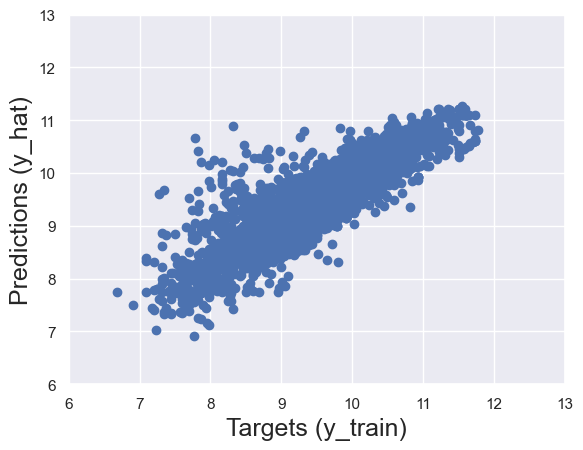

In [576]:
# The simplest way to compare the targets (y_train) and the predictions (y_hat) is to plot them on a scatter plot
# The closer the points to the 45-degree line, the better the prediction
plt.scatter(y_train, y_hat)

# Let's also name the axes
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)

# Sometimes the plot will have different scales of the x-axis and the y-axis
# This is an issue as we won't be able to interpret the '45-degree line'
# We want the x-axis and the y-axis to be the same
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

The closer our scatter plot to the line 45 degree, the better our model.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Residuals PDF')

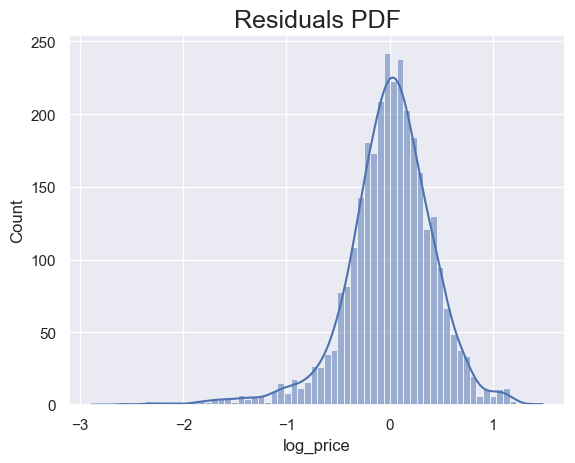

In [578]:
# Another useful check of our model is a residual plot
# We can plot the PDF of the residuals and check for anomalies
#sns.distplot(y_train - y_hat)
sns.histplot(y_train - y_hat, kde=True)

# Include a title
plt.title("Residuals PDF", size=18)

# In the best case scenario this plot should be normally distributed
# In our case we notice that there are many negative residuals (far away from the mean)
# Given the definition of the residuals (y_train - y_hat), negative values imply
# that y_hat (predictions) are much higher than y_train (the targets)
# This is food for thought to improve our model

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='log_price', ylabel='Count'>

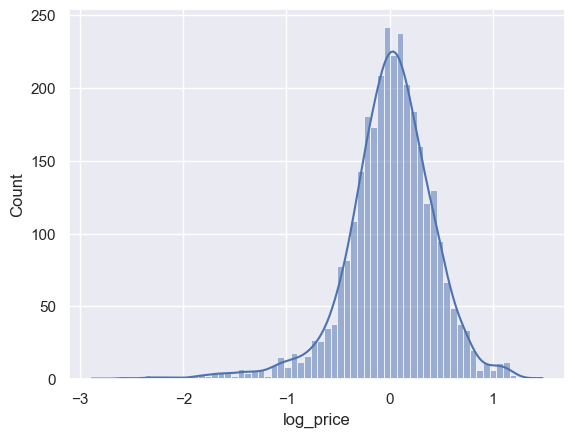

In [579]:
sns.histplot(y_train - y_hat, kde=True)

Residual = differences between the targets and the predictions. The residual are the estimate of the error. 
The residual $ \epsilon - N(0,\sigma) $

In [581]:
# Find the R-squared of the model
reg.score(x_train,y_train)

# Note that this is NOT the adjusted R-squared
# in other words... find the Adjusted R-squared to have the appropriate measure :)

0.744996578792662

#### Understanding R-squared in the OLS Model

- R-squared (Coefficient of Determination):

The R-squared value is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by the independent variables in the model. In the given model, the R-squared value is 0.744.

In [677]:
## Function for adjusted-R
def adj_r2(x,y):
    r2 = reg.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [679]:
adj_r2(x_train,y_train)

0.7435868037811093

- Adjusted R-squared:

The adjusted R-squared value adjusts the statistic based on the number of independent variables and the number of observations in the model. It penalizes the addition of irrelevant variables that do not improve the model. The adjusted R-squared value in this model is 0.7435.

*Interpretation*:
    An R-squared value of 0.744 means that approximately 74.4% of the variability in the log-transformed car prices can be explained by the model's independent variables (Mileage, EngineV, Brand, Body type, Engine Type, and Registration status). The remaining 26.3% of the variability in car prices is due to factors not included in the model (unexplained variance).

Summary:
The R-squared value indicates a good fit for the model, with 74.4% of the variance in log-transformed car prices explained by the included variables. The adjusted R-squared value is close to the R-squared value, suggesting that the model's explanatory power is not significantly diminished by the number of predictors. Further investigation into multicollinearity and potential inclusion of other relevant variables could improve the model.

### Finding the weights and bias

In [587]:
# Obtain the bias (intercept) of the regression
reg.intercept_

9.415239458021299

In [588]:
# Obtain the weights (coefficients) of the regression
reg.coef_

# Note that they are barely interpretable if at all

array([-0.44871341,  0.20903483,  0.0142496 ,  0.01288174, -0.14055166,
       -0.17990912, -0.06054988, -0.08992433, -0.1454692 , -0.10144383,
       -0.20062984, -0.12988747, -0.16859669, -0.12149035, -0.03336798,
       -0.14690868,  0.32047333])

In [589]:
# Create a regression summary where we can compare them with one-another
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.45
1,EngineV,0.21
2,Brand_BMW,0.01
3,Brand_Mercedes-Benz,0.01
4,Brand_Mitsubishi,-0.14
5,Brand_Renault,-0.18
6,Brand_Toyota,-0.06
7,Brand_Volkswagen,-0.09
8,Body_hatch,-0.15
9,Body_other,-0.10


Weight interpretation :
- Continuous Variables

1. A positive weight shows that as a feature increases in value, so do the log price or price respectively.
2. A negative weight shows that as a feature increases in value, the log price or price decrease.

For example: the more car is being driven (Mileage), the lower the price gets.

- Dummy Variables

1. A positive weight shows that the respective category (Brand) is more expensive than the benchmark (Audi). For example BMW is positive means that is more expensive than audi.
2. A negative weight shows that the respective category (Brand) is less expensive than the benchmark (Audi).

In [591]:
# Check the different categories in the 'Brand' variable
data_cleaned['Brand'].unique()

# In this way we can see which 'Brand' is actually the benchmark

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

In [592]:
data_cleaned['Body'].unique()

array(['sedan', 'van', 'crossover', 'vagon', 'other', 'hatch'],
      dtype=object)

In [593]:
data_cleaned['Engine Type'].unique()

array(['Petrol', 'Diesel', 'Gas', 'Other'], dtype=object)

## Testing

In [595]:
# Once we have trained and fine-tuned our model, we can proceed to testing it
# Testing is done on a dataset that the algorithm has never seen
# Luckily we have prepared such a dataset
# Our test inputs are 'x_test', while the outputs: 'y_test' 
# We SHOULD NOT TRAIN THE MODEL ON THEM, we just feed them and find the predictions
# If the predictions are far off, we will know that our model overfitted
y_hat_test = reg.predict(x_test)

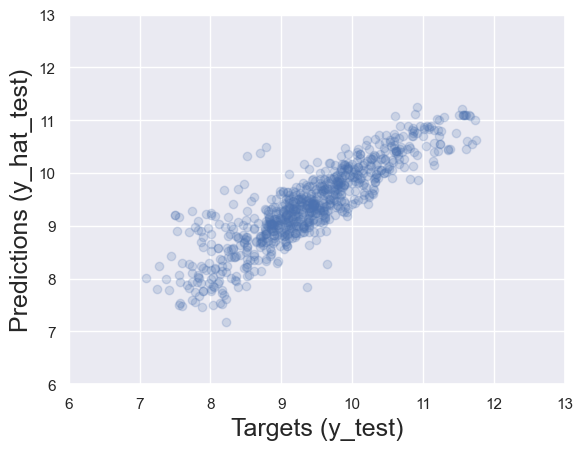

In [596]:
# Create a scatter plot with the test targets and the test predictions
# You can include the argument 'alpha' which will introduce opacity to the graph
plt.scatter(y_test, y_hat_test, alpha=0.2) 
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

The more saturated the color, the higher the concentration of points. 

In [598]:
# Finally, let's manually check these predictions
# To obtain the actual prices, we take the exponential of the log_price
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

,Prediction
0,10685.50
1,3499.26
2,7553.29
3,7463.96
4,11353.49


These are the predictions of the log prices. Since we interest in prices so we take the exponetial of the log prices, we will reach the original prices. 

In [600]:
# We can also include the test targets in that data frame (so we can manually compare them)
df_pf['Target'] = np.exp(y_test)
df_pf

# Note that we have a lot of missing values
# There is no reason to have ANY missing values, though
# This suggests that something is wrong with the data frame / indexing

,Prediction,Target
0,10685.50,NaN
1,3499.26,7900.00
2,7553.29,NaN
3,7463.96,NaN
4,11353.49,NaN
5,21289.80,14200.00
6,20159.19,NaN
7,20349.62,NaN
8,11581.54,11950.00
9,33614.62,NaN


In [601]:
# After displaying y_test, we find what the issue is
# The old indexes are preserved (recall earlier in that code we made a note on that)
# The code was: data_cleaned = data_4.reset_index(drop=True)

# Therefore, to get a proper result, we must reset the index and drop the old indexing
y_test = y_test.reset_index(drop=True)

# Check the result
y_test.head()

0   7.74
1   7.94
2   7.82
3   8.76
4   9.12
Name: log_price, dtype: float64

In [602]:
# Let's overwrite the 'Target' column with the appropriate values
# Again, we need the exponential of the test log price
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,10685.50,2300.00
1,3499.26,2800.00
2,7553.29,2500.00
3,7463.96,6400.00
4,11353.49,9150.00
5,21289.80,20000.00
6,20159.19,38888.00
7,20349.62,16999.00
8,11581.54,12500.00
9,33614.62,41000.00


In [603]:
# Additionally, we can calculate the difference between the targets and the predictions
# Note that this is actually the residual (we already plotted the residuals)
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

# Since OLS is basically an algorithm which minimizes the total sum of squared errors (residuals),
# this comparison makes a lot of sense

In [604]:
# Finally, it makes sense to see how far off we are from the result percentage-wise
# Here, we take the absolute difference in %, so we can easily order the data frame
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,10685.50,2300.00,-8385.50,364.59
1,3499.26,2800.00,-699.26,24.97
2,7553.29,2500.00,-5053.29,202.13
3,7463.96,6400.00,-1063.96,16.62
4,11353.49,9150.00,-2203.49,24.08
5,21289.80,20000.00,-1289.80,6.45
6,20159.19,38888.00,18728.81,48.16
7,20349.62,16999.00,-3350.62,19.71
8,11581.54,12500.00,918.46,7.35
9,33614.62,41000.00,7385.38,18.01


In [605]:
# Sometimes it is useful to check these outputs manually
# To see all rows, we use the relevant pandas syntax
pd.options.display.max_rows = 999
# Moreover, to make the dataset clear, we can display the result with only 2 digits after the dot 
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# Finally, we sort by difference in % and manually check the model
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
698,30480.85,30500.00,19.15,0.06
742,16960.31,16999.00,38.69,0.23
60,12469.21,12500.00,30.79,0.25
110,25614.14,25500.00,-114.14,0.45
367,42703.68,42500.00,-203.68,0.48
369,3084.69,3100.00,15.31,0.49
769,29651.73,29500.00,-151.73,0.51
272,9749.53,9800.00,50.47,0.52
714,23118.07,22999.00,-119.07,0.52
630,8734.58,8800.00,65.42,0.74


How to improve our model : 
- use a different set of variables.
- remove a bigger part of outliers.
- use a differrent kind of transformations.
